# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
# Load the CSV file
df = pd.read_csv("./Stock_Data/clean_stocks.csv")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Aggregate data to daily level (example: using mean)
df = df.groupby('Date').mean()
df['Daily_Return'] = df['Close'].pct_change().dropna()  # Calculate daily returns
df

C:\Users\lualg\AppData\Local\Temp\ipykernel_20560\4056873007.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('Date').mean()


,Open,High,Low,Close,Adj Close,Volume,Daily_Return
Date,,,,,,,
2023-02-07,218.327501,224.212494,217.111994,223.300001,223.073938,4.354805e+07,NaN
2023-02-08,222.447502,225.777504,218.536247,221.369999,221.145496,4.965132e+07,-0.008643
2023-02-09,225.132498,225.687500,217.204994,218.112497,217.890341,5.077048e+07,-0.014715
2023-02-10,216.472502,218.647501,212.887505,214.082497,213.918159,3.497140e+07,-0.018477
2023-02-13,215.775003,220.977503,214.092499,219.685005,219.515533,3.927022e+07,0.026170
...,...,...,...,...,...,...,...
2023-05-01,228.352501,229.740004,224.844997,226.744997,226.744997,2.500870e+07,-0.008863
2023-05-02,227.627502,228.332502,222.892498,224.369997,224.369997,2.487295e+07,-0.010474
2023-05-03,224.972496,228.069994,223.180002,224.317495,224.317495,2.741930e+07,-0.000234


# Value at Risk (VaR)

In [5]:
def calculate_var(returns, alpha=0.05):
    """Calculates Value at Risk (VaR)."""
    return returns.quantile(alpha)

In [6]:
var_historical = calculate_var(df['Daily_Return'])
var_parametric = stats.norm.ppf(0.05, df['Daily_Return'].mean(), df['Daily_Return'].std())

print(f"Historical VaR (95%): {var_historical}")
print(f"Parametric VaR (95%): {var_parametric}")

Historical VaR (95%): -0.020100369549878594
Parametric VaR (95%): -0.03081529945162158


# Conditional Value at Risk (CVaR)

In [7]:
def calculate_cvar(returns, alpha=0.05):
    """Calculates Conditional Value at Risk (CVaR)."""
    var = returns.quantile(alpha)
    cvar = returns[returns <= var].mean()
    return cvar

In [8]:
cvar_historical = calculate_cvar(df['Daily_Return'])
print(f"Historical CVaR (95%): {cvar_historical}")

Historical CVaR (95%): -0.023545490798930868


# Drawdown Analysis

In [9]:
def calculate_drawdown(prices):
    """Calculates drawdown."""
    peak = prices.iloc[0]
    drawdowns = [0]
    for price in prices.iloc[1:]:
        if price > peak:
            peak = price
        drawdown = (peak - price) / peak
        drawdowns.append(drawdown)
    return pd.Series(drawdowns, index=prices.index)

In [10]:
drawdowns = calculate_drawdown(df['Close'])
max_drawdown = drawdowns.max()

print(f"Maximum Drawdown: {max_drawdown}")

Maximum Drawdown: 0.12577249861413997


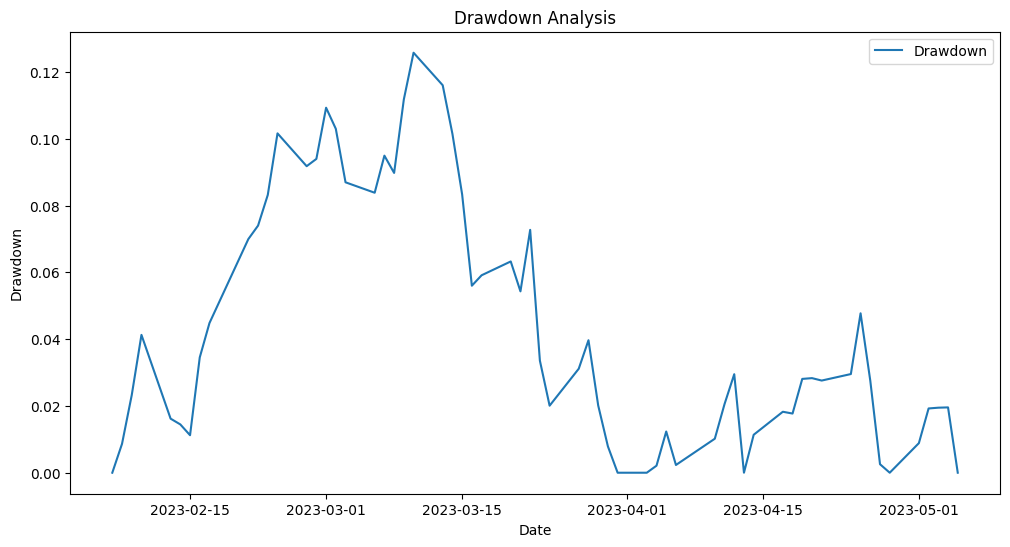

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(drawdowns, label='Drawdown')
plt.title('Drawdown Analysis')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.show()

# Rolling Volatility

In [12]:
df['Rolling_Volatility'] = df['Daily_Return'].rolling(window=30).std()

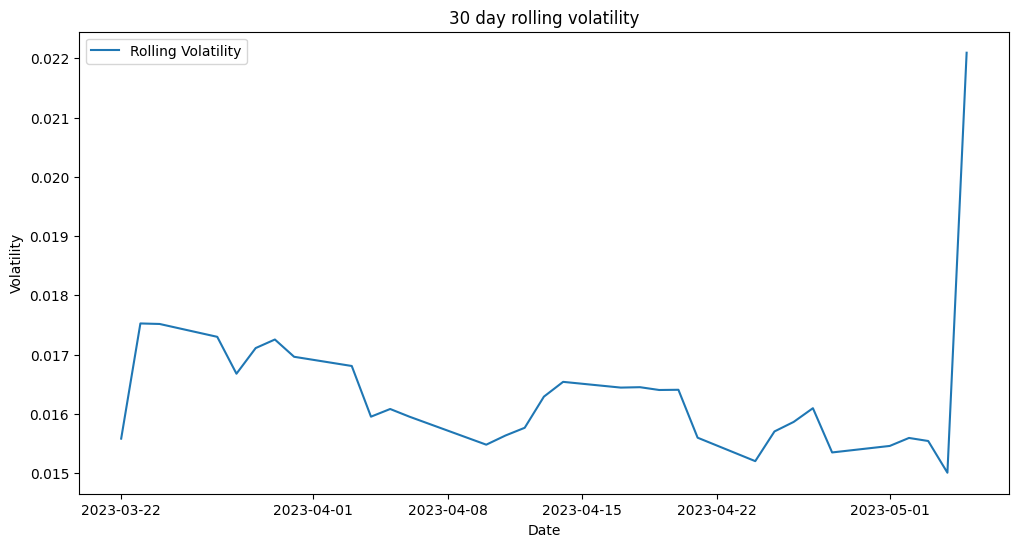

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df['Rolling_Volatility'], label = "Rolling Volatility")
plt.title('30 day rolling volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()